In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv("../data/raw/filtered.tsv", sep="\t")

data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [3]:
data.describe()

,Unnamed: 0,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


#### ref_tox vs trn_tox

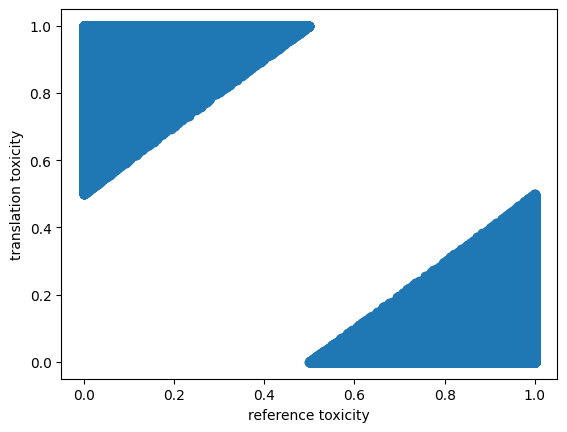

In [4]:
plt.scatter(data["ref_tox"], data["trn_tox"])
plt.xlabel("reference toxicity")
plt.ylabel("translation toxicity")
plt.show()

In [5]:
(data["ref_tox"] - data["trn_tox"]).abs().min()

0.50000165309757

Because data was generated as a subset of ParaNMT (general paraphrasing dataset), translation can have higher toxicity than reference. Need to consider that during preprocessing.

#### Length diff
After several trials, it turned out that lenght_diff is calculated using the function below:

In [6]:
def calculate_length_diff(text1, text2):
    l1 = len(text1) + 1
    l2 = len(text2) + 1

    return 2 * abs(l1 - l2) / (l1 + l2 + abs(l1 - l2))


diffs = data[["reference", "translation"]].apply(lambda row: calculate_length_diff(*row), axis=1)
np.isclose(diffs, data["lenght_diff"], atol=1e-10).all()

True

#### Impact of similarity and lenght_diff on toxicity difference

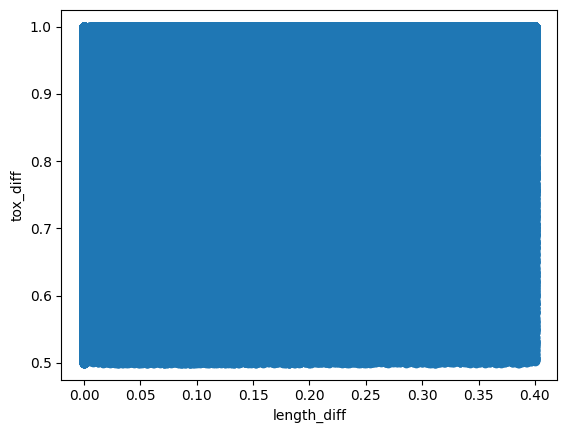

In [7]:
tox_diff = (data["ref_tox"] - data["trn_tox"]).abs()

plt.scatter(data["lenght_diff"], tox_diff)
plt.xlabel("length_diff")
plt.ylabel("tox_diff")
plt.show()

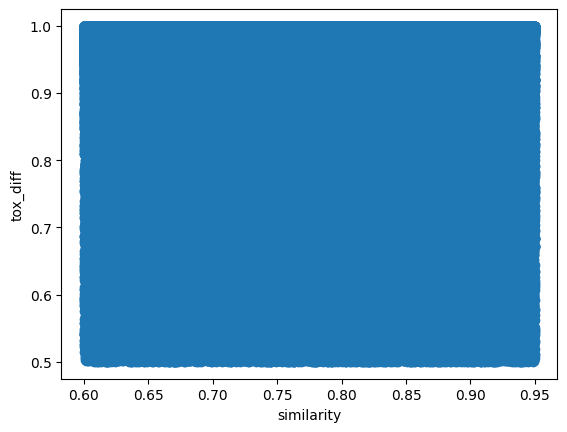

In [8]:
plt.scatter(data["similarity"], tox_diff)
plt.xlabel("similarity")
plt.ylabel("tox_diff")
plt.show()

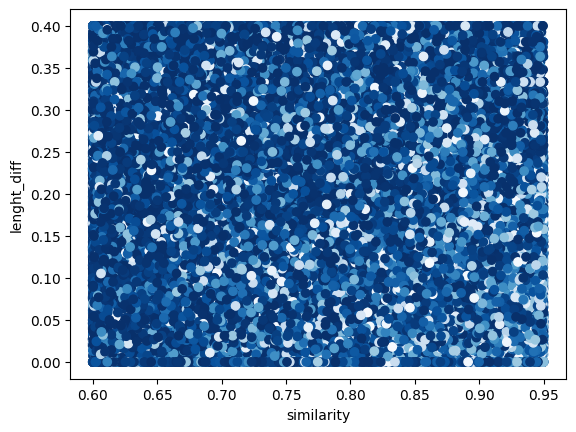

In [9]:
plt.scatter(data["similarity"], data["lenght_diff"], c=tox_diff, cmap="Blues")
plt.xlabel("similarity")
plt.ylabel("lenght_diff")
plt.show()

It seems that there is no strong impact (or probably no impact) of similarity and lenhgt_diff on tox_diff

### Conclusion

I haven't found any insights from the numeric data, so I plan to use only the textual data for training. Though, I should be careful during the dataset creation, as the reference and the translation do not map to the input and the target directly: I have to swap some values in order to have the toxicity score of the input to be greater than the toxicity score of the target.